<center><font face="Times New ROman" size="10" color="#000080">- NA44-</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- SEM O SONICO -</font>

In [1]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
#----------------------------------------#
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#----------------------------------------#
name = 'na-44'

In [2]:
#--------------------------Armazenando os Dados-------------------------------#

data  = np.fromfile('NA44D.dat', dtype=float, count=-1, sep='	')

p  = len(data)/6 

print len(data),'- comprimento original, antes da divisao'
print p,'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/6,6))

7878 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna


In [3]:
#--------------------------As propriedades petrofisicas do poco-------------------------------#

prof = data[:,0] # profundidade em metros
DTP  = data[:,1] # DTp em us/ft
GR   = data[:,2] # GR em unidades API
ILD  = data[:,3] # ILD em Ohm.m
PHIN = data[:,4] # PHIN em %
RHOb = data[:,5] # RHOb em g/cm3

print prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]

2950.0556 -999.0 118.5156 1.3486 20.463 2.4595


C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-999.0, right=-999.0
  'left=%s, right=%s') % (left, right))


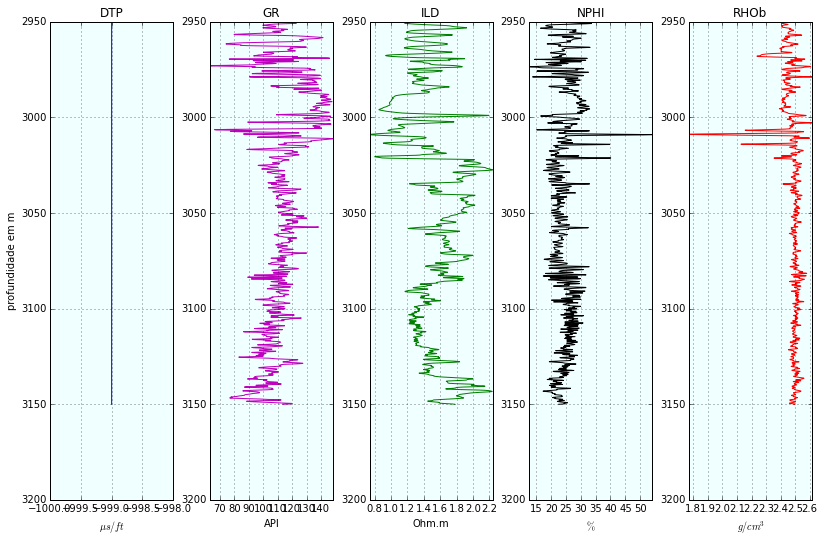

In [4]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')   

ax2.plot(DTP,prof,'-b',linewidth = 1) # repare que está DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('DTP')     # aqui o titulo 
ax2.set_xlabel('$\mu s/ft$')        # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')   # aqui o que representa o eixo y

plt.gca().invert_yaxis()              # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(DTP),xmin=min(DTP)) # aqui determinamos o valor maximo e minimo de DTP como limites do grafico
plt.grid()                            # adicionamos o grid    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(GR),xmin=min(GR))
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(ILD),xmin=min(ILD))
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Argilosidade -</font>

In [5]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

151 posicao do GR min | 63.0937 valor do GR min
401 posicao do GR min | 148.2187 valor do GR max

0.589150986017  media (IGR) - indice de raio gama
0.330937341215  media (VSH) - quantidade de folhelho 


<br><center><font face="Times New ROman" size="6" color="#000000">- Porosidades -</font>

In [6]:
#-------------------------------Porosidade Total-----------------------------------#

RHOf  = 1.101 # g/cm3 para a agua salgada
DTPf = 189.0 # us/feet para agua salgada

RHOma  = 2.65 # g/cm3 para o quartzo
DTPma = 55.5 # us/feet para o quartzo

print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
print DTPma,'dtma da matriz |',DTPf,'DTPf do filtrado de lama'

#-----------------------------------------------------------

PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma)/(RHOf - RHOma))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'


PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %'

#-------------------------------------------------------------------------------------------

for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'

2.65 RHOma da matriz  | 1.101 RHOf do filtrado de lama
55.5 dtma da matriz | 189.0 DTPf do filtrado de lama

10.8271311811  media (PHItd) - porosidade total pelo perfil densidade em %

13.7099148204  media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %
126  ponto de folhelho (Psh)

2.5039 densidade do folhelho (RHOsh)


In [7]:
#-------------------------------Porosidade Efetiva-----------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh - RHOma)/(RHOf - RHOma)))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva'

7.70576607127  media (PHIe) -  porosidade efetiva


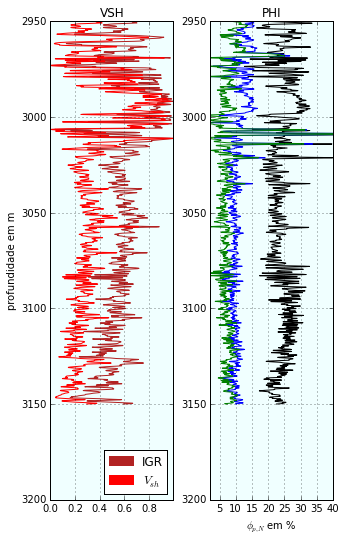

In [8]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(IGR,prof,'-',linewidth = 1,color='#B22222')
ax8.plot(VSH,prof,'-',linewidth = 1,color='red')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('VSH')
ax8.set_xlabel(' ')
ax8.set_ylabel('profundidade em m')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(VSH),xmin=min(VSH))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(PHIN,prof,'-k',linewidth = 1)
ax9.plot(PHItd,prof,'-b',linewidth = 1)
ax9.plot(PHIe,prof,'-g',linewidth = 1)
ax9.set_title('PHI')
ax9.set_xlabel('$\phi _{p,N}$ em %')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=40,xmin=2)
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético -</font>

In [9]:
#-----------------------------Siqueira----------------------------------
PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar

DTPs = []

for i in range (p):
    
    DTPs.append(DTPma + (DTPf - DTPma)*((PHItd[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)
    
#---------------------------------------------------------------------------------------------------

ms   = mean(DTPs)
mdtp = mean(DTP)

print ms

80.0033490218


In [10]:
VPa = [] # Vp de augusto

cfvp0 = 3.2808*(10**(-6)) # fator de conversao 

for i in range (p): # determinando VPa em ms
    VPa.append(4.63 -(9.82*PHIe[i]/100.0) - (2.25*VSH[i]) + (0.08*ILD[i]) + (4.06*(PHIe[i]/100.0)*VSH[i]) - (0.22*(PHIe[i]/100.0)*ILD[i]) + ((1.92*(10**(-3)))*(VSH[i])*ILD[i])+ (17.18*(PHIe[i]/100)**2)+(1.26*VSH[i]**2)-((2.66*(10**(-4)))*ILD[i]**2))

DTPa = []
for i in range(p):
    VPa[i] = VPa[i]*1000.000
    DTPa.append(1.0000/(cfvp0*VPa[i]))

#---------------------------------------------------------------------------------------------------

ma   = mean(DTPa)
mdtp = mean(DTP)

print ma
print mean(VPa)

84.0992218766
3635.36638964


$V_p(\phi_{e,D},V_{sh},R_{ILD}) = 4.63 − 9.82 \phi_{e,D} − 2.25 V_{sh} + 0.08 R_{ILD} + 4.06 (\phi_{e,D}. V_{sh}) −220.22 (\phi_{e,D} . R_{ILD}) + 1.92 × 10^{−3} (V_{sh} . R_{ILD}) + 17.18 \phi_{e,D}^2 + 1.26 V_{sh}^2 − 2.66 × 10^{−4} R_{ILD}^2 $ - Augusto

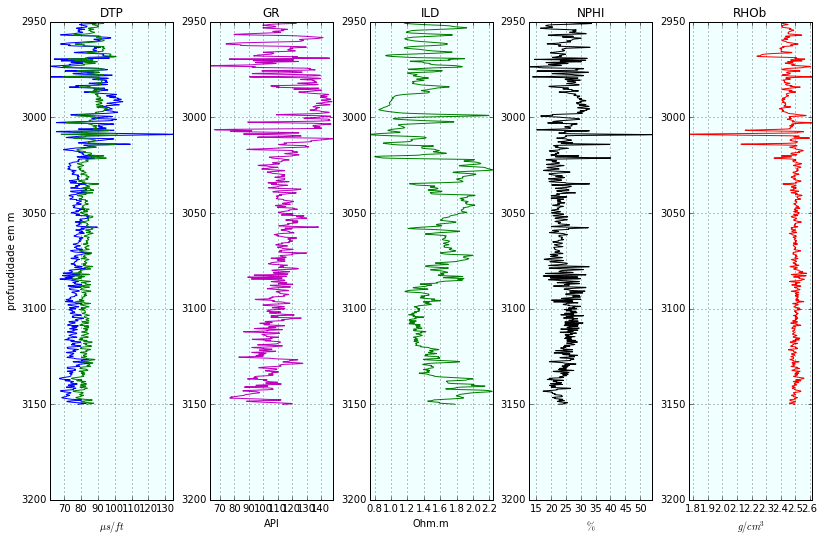

In [11]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')   

ax2.plot(DTPs,prof,'-b',linewidth = 1)
ax2.plot(DTPa,prof,'-g',linewidth = 1) # repare que está DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('DTP')     # aqui o titulo 
ax2.set_xlabel('$\mu s/ft$')        # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')   # aqui o que representa o eixo y

plt.gca().invert_yaxis()              # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(DTPs),xmin=min(DTPs)) # aqui determinamos o valor maximo e minimo de DTP como limites do grafico
plt.grid()                            # adicionamos o grid    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(GR),xmin=min(GR))
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(ILD),xmin=min(ILD))
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Impedância Acústica -</font>

In [12]:
#---------------------Impedancia---(transformado de pe pra m)----------------------------
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m
    
VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))
    
#------------------------------------------Impedancia Acustica-----------------------------------#

z_imp_a = [] # Impedancia acustica Augusto  (m/s).(g/cm3)
z_imp_s = [] # Impedancia acustica Siqueira (m/s).(g/cm3)

Za = [] # Impedancia acustica Augusto (Km/s).(g/cm3)
Zs = [] # Impedancia acustica Siqueira(Km/s).(g/cm3)

for i in range (p):
    
    z_imp0a = (RHOsi[i]*VPa[i]) # de olho no RHOsi e RHOb
    z_imp_a.append(z_imp0a)
    Za.append(z_imp0a*1000.000)
    
    z_imp0s = (RHOsi[i]*VPs[i]) # de olho no RHOsi e RHOb
    z_imp_s.append(z_imp0s)
    Zs.append(z_imp0s*1000.000)
    
#--------------------------------------------------------------------------------------------------------#

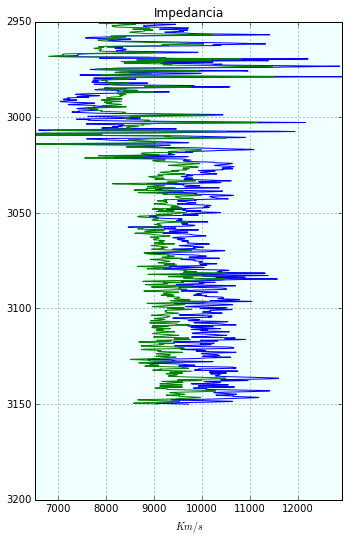

In [13]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(Zs,prof,'-b',linewidth = 1)
ax9.plot(Za,prof,'-g',linewidth = 1)
ax9.set_title('Impedancia')
ax9.set_xlabel('$Km/s$')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(Zs),xmin=min(Za))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Refletividade -</font>

In [14]:
#--------------------------------Refletividades---------------------

Rs = [] # Refletividade Siqueira
Ra = [] # Refletividade Augusto

for i in range (p):
    if i == 0:
        RRs= 0
        RRa= 0
    if i != 0:
        RRs= (z_imp_s[i-1] - z_imp_s[i])/(z_imp_s[i-1] + z_imp_s[i])
        RRa= (z_imp_a[i-1] - z_imp_a[i])/(z_imp_a[i-1] + z_imp_a[i])
    Rs.append(RRs)
    Ra.append(RRa)
    
zero_bar = [0]*p

print VPa[10]
print VPs[10]

3511.52775068
3854.04211574


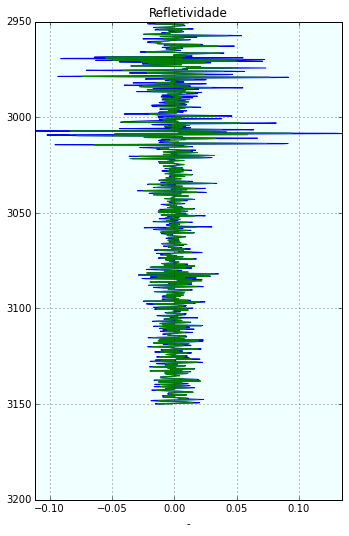

In [15]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(Rs,prof,'-b',linewidth = 1)
ax9.plot(Ra,prof,'-g',linewidth = 1)
ax9.set_title('Refletividade')
ax9.set_xlabel('-')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(Rs),xmin=min(Rs))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Tempo -</font>

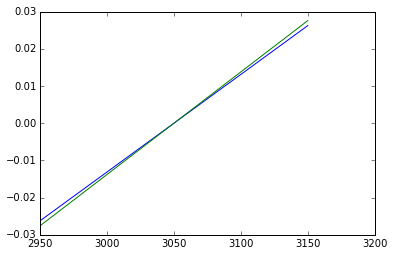

In [16]:
#---------------------------------------------time c(t)-----------------------------#
DL = prof[3]-prof[2]# valor do intervalo em m

Ts = [] #tempo por intervalo Siqueira
Ta = [] #tempo por intervalo Augusto 

for i in range (p):
    Ts.append(DL/VPs[i])
    Ta.append(DL/VPa[i])
    
#---------------------------------------------time c(t)-----------------------------#

# de 1313 elementos, o elemento 657 e central. No pyton, esse elemento e o 656

mp  = (p-1)/2 # termo central

dtfs = [0.0]*mp
dtbs = [0.0]*mp

dtfa = [0.0]*mp
dtba = [0.0]*mp

#----------------------------------------------------#

for i in range (mp):
    
    dtfs[i] = np.mean(Ts)
    dtbs[i] = -(np.mean(Ts))
    
    dtfa[i] = np.mean(Ta)
    dtba[i] = -(np.mean(Ta))
    
for i in range (1,mp):

    dtfs[i] = dtfs[i-1] + dtfs[i]
    dtfa[i] = dtfa[i-1] + dtfa[i]
    
for i in range (1,mp):

    dtbs[i] = dtbs[i-1] + dtbs[i]
    dtba[i] = dtba[i-1] + dtba[i]
    

dtbs.reverse()
dtba.reverse()

TTs = [0.0]*p
TTa = [0.0]*p

for i in range (len(dtbs)):

    TTs[i] = dtbs[i]
    TTa[i] = dtba[i]

for i in range (mp+1,p):

    TTs[i] = dtfs[i-mp-1]
    TTa[i] = dtfa[i-mp-1]

plt.plot(prof,TTs,'-b')
plt.plot(prof,TTa,'-g')
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Wavlet -</font>

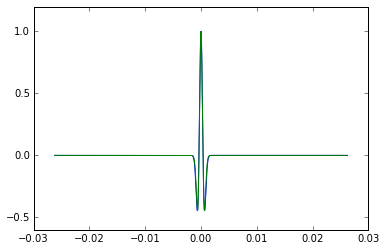

In [17]:
#wavlet

A = 1.000000
f = 600 #30.000 # 133
ff = str(f) + " - Hz"
j = 400
    
wavs = []
for i in range (len(TTs)):
    a = f
    EE1s = -(np.pi**2)*(a**2)*(TTs[i]**2)
    wav01s = A*(1 - (2*(np.pi**2)) * (a**2) * (TTs[i]**2))*np.exp(EE1s) # 2497.55919007
    wavs.append(wav01s)
    
wava = []
for i in range (len(TTs)):
    EE1a = -(np.pi**2)*(a**2)*(TTa[i]**2)
    wav01a = A*(1 - (2*(np.pi**2)) * (a**2) * (TTa[i]**2))*np.exp(EE1a) # 2497.55919007
    wava.append(wav01a)
    
    

plt.plot(TTs,wavs,'-b')
plt.plot(TTs,wava,'-g')
plt.show()

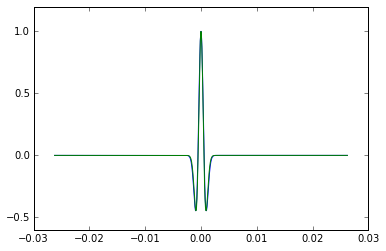

In [18]:
#wavlet

A1 = 1.000000
f1 = 410 #30.000 # 133
ff1 = str(f1) + " - Hz"
j1 = 400
a1 = f1

    
wav1s = []
for i in range (len(TTs)):
    EE2s = -(np.pi**2)*(a1**2)*(TTs[i]**2)
    wav02s = (1 - (2*(np.pi**2)) * (a1**2) * (TTs[i]**2))*np.exp(EE2s) # 2497.55919007
    wav1s.append(wav02s)
    
wav1a = []
for i in range (len(TTs)):
    EE2a = -(np.pi**2)*(a1**2)*(TTa[i]**2)
    wav02a = (1 - (2*(np.pi**2)) * (a1**2) * (TTa[i]**2))*np.exp(EE2a) # 2497.55919007
    wav1a.append(wav02a)
    
    
plt.plot(TTs,wav1s,'-b')
plt.plot(TTs,wav1a,'-g')
plt.show()

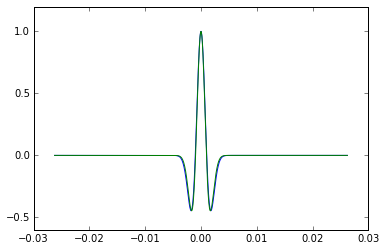

In [19]:
#wavlet

A2 = 1.000000
f2 = 220 #30.000 # 133
ff2 = str(f2) + " - Hz"
j2 = 400
a2 = f2

wav2s = []
for i in range (len(TTs)):
    EE3s = -(np.pi**2)*(a2**2)*(TTs[i]**2)
    wav03s = (1 - (2*(np.pi**2)) * (a2**2) * (TTs[i]**2))*np.exp(EE3s) # 2497.55919007
    wav2s.append(wav03s)
    
wav2a = []
for i in range (len(TTs)):
    EE3a = -(np.pi**2)*(a2**2)*(TTa[i]**2)
    wav03a = (1 - (2*(np.pi**2)) * (a2**2) * (TTa[i]**2))*np.exp(EE3a) # 2497.55919007
    wav2a.append(wav03a)
    
plt.plot(TTs,wav2s,'-b')
plt.plot(TTs,wav2a,'-g')
plt.show()

30 - Hz


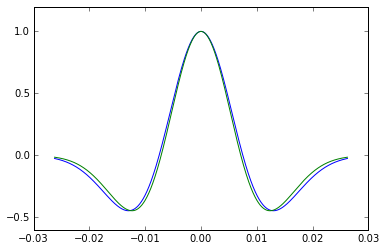

In [20]:
#wavlet

A3 = 1.000000
f3 = 30
ff3 = str(f3) + " - Hz" # transforma em string
j3 = 400
print ff3
a3 = f3

wav3s = []
for i in range (len(TTs)):
    a3 = A3*f3
    EE4s = -(np.pi**2)*(a3**2)*(TTs[i]**2)
    wav04s = (1 - (2*(np.pi**2)) * (a3**2) * (TTs[i]**2))*np.exp(EE4s) # 2497.55919007
    wav3s.append(wav04s)
    
wav3a = []
for i in range (len(TTs)):
    a3 = A3*f3
    EE4a = -(np.pi**2)*(a3**2)*(TTa[i]**2)
    wav04a = (1 - (2*(np.pi**2)) * (a3**2) * (TTa[i]**2))*np.exp(EE4a) # 2497.55919007
    wav3a.append(wav04a)
    
plt.plot(TTs,wav3s,'-b')
plt.plot(TTs,wav3a,'-g')
plt.show()


<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Sinal -</font>

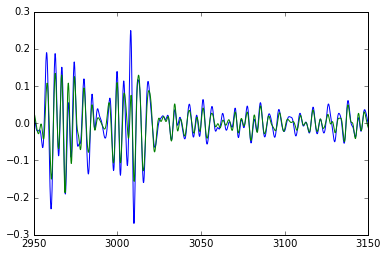

In [21]:
# Convolucao

signals = np.convolve(Rs,wavs,'same') # wavlet convolucao Siqueira
signala = np.convolve(Ra,wava,'same') # wavlet convolucao Augusto

plt.plot(prof,signals,'-b')
plt.plot(prof,signala,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

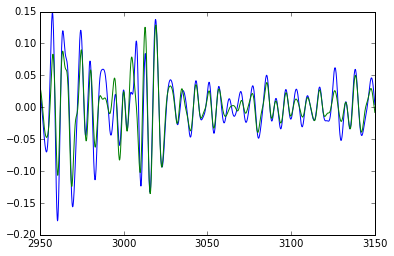

In [22]:
# Convolucao

signal1s = np.convolve(Rs,wav1s,'same') # wavlet convolucao Siqueira
signal1a = np.convolve(Ra,wav1a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal1s,'-b')
plt.plot(prof,signal1a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

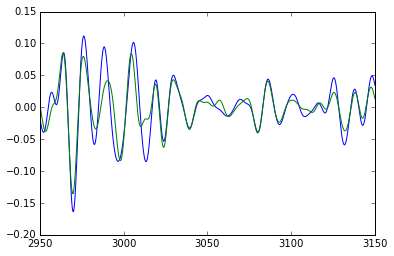

In [23]:
# Convolucao

signal2s = np.convolve(Rs,wav2s,'same') # wavlet convolucao Siqueira
signal2a = np.convolve(Ra,wav2a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal2s,'-b')
plt.plot(prof,signal2a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

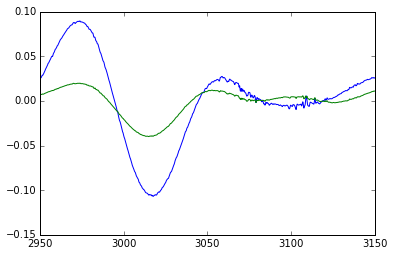

In [24]:
# Convolucao

signal3s = np.convolve(Rs,wav3s,'same') # wavlet convolucao Siqueira
signal3a = np.convolve(Ra,wav3a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal3s,'-b')
plt.plot(prof,signal3a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Resultados -</font>

In [25]:
#---------------------------------Medidas-Estatisticas------------------------------------#

#----------------------------------------------#
medVPa = np.mean(VPa) # media
maxVPa = max    (VPa) # maximo
minVPa = min    (VPa) # minimo
varVPa = np.var (VPa) # variancia
stdVPa = np.std (VPa) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPa------------"
print medVPa,"m/s   - media "
print maxVPa,"m/s   - valor maximo"
print minVPa,"m/s   - valor minimo"
print varVPa,"m²/s² - variancia"
print stdVPa,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPs = np.mean(VPs) # media
maxVPs = max    (VPs) # maximo
minVPs = min    (VPs) # minimo
varVPs = np.var (VPs) # variancia
stdVPs = np.std (VPs) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPs------------"
print medVPs,"m/s   - media "
print maxVPs,"m/s   - valor maximo"
print minVPs,"m/s   - valor minimo"
print varVPs,"m²/s² - variancia"
print stdVPs,"m/s   - desvio padrao"
print "-------------------------------------"


-----------valores de VPa------------
3635.36638964 m/s   - media 
4472.52922946 m/s   - valor maximo
2995.41182957 m/s   - valor minimo
39390.6034211 m²/s² - variancia
198.470661361 m/s   - desvio padrao
-------------------------------------
-----------valores de VPs------------
3848.755381 m/s   - media 
4941.85759068 m/s   - valor maximo
2263.91491207 m/s   - valor minimo
134628.04641 m²/s² - variancia
366.916947565 m/s   - desvio padrao
-------------------------------------


In [26]:
#-----------------------------------------Porosidade Sonica-------------------------------------------

PHIts = []
PHIes = []
gas   = []

DTPsh = DTPs[Psh]
for i in range (p):
    
    PHIts.append(((DTPs[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTPs[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh - DTPma)/(DTPf - DTPma))))*100.00)

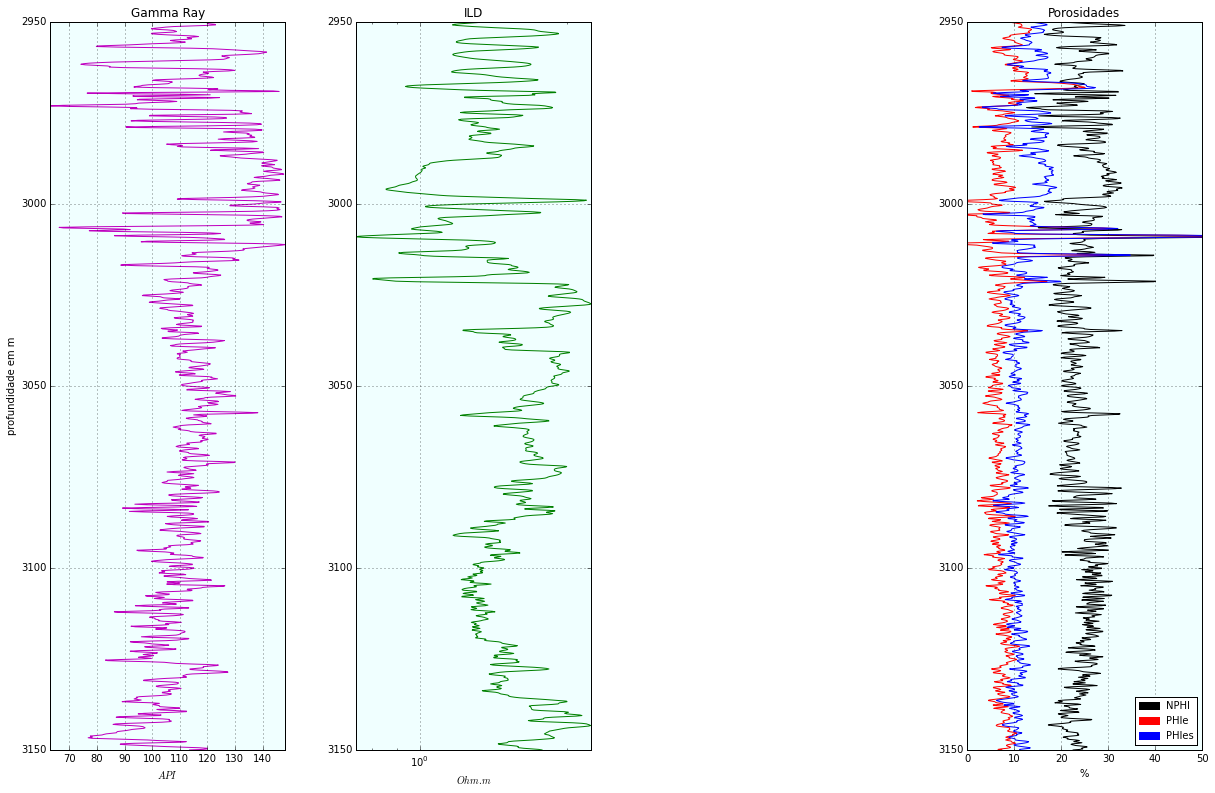

In [27]:
fig = plt.figure(figsize= (20,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')   

ax2.plot(GR,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('Gamma Ray')                             # aqui o titulo 
ax2.set_xlabel('$API$')                     # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')              # aqui o que representa o eixo y

#                         # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(GR),xmin=min(GR))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#-------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')   

ax2.semilogx(ILD,prof,'-g',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('ILD')                             # aqui o titulo 
ax2.set_xlabel('$Ohm.m$')                     

plt.xlim(xmax=max(ILD),xmin=min(ILD))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#----------------------------------------------------------------------------------------------------#
ax2 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')   

ax2.plot(PHIN,prof,'-k',linewidth = 1)
ax2.plot(PHIe,prof,'-r',linewidth = 1)
#ax2.plot(PHItd,prof,'-m',linewidth = 1)
ax2.plot(PHIes,prof,'-b',linewidth = 1)
#ax2.plot(PHIts,prof,'-c',linewidth = 1)

ax2label1 = mpatches.Patch(label='NPHI',color='k')
ax2label2 = mpatches.Patch(label='PHIe',color='r')
ax2label3 = mpatches.Patch(label='PHIes',color='b')

ax2.set_title('Porosidades') 
ax2.set_xlabel('%')                     

plt.legend(handles=[ax2label1, ax2label2, ax2label3],loc=4,fontsize=10) # fontsize = tamanho da fonte
plt.xlim(xmax=50,xmin=0.0)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

plt.show()

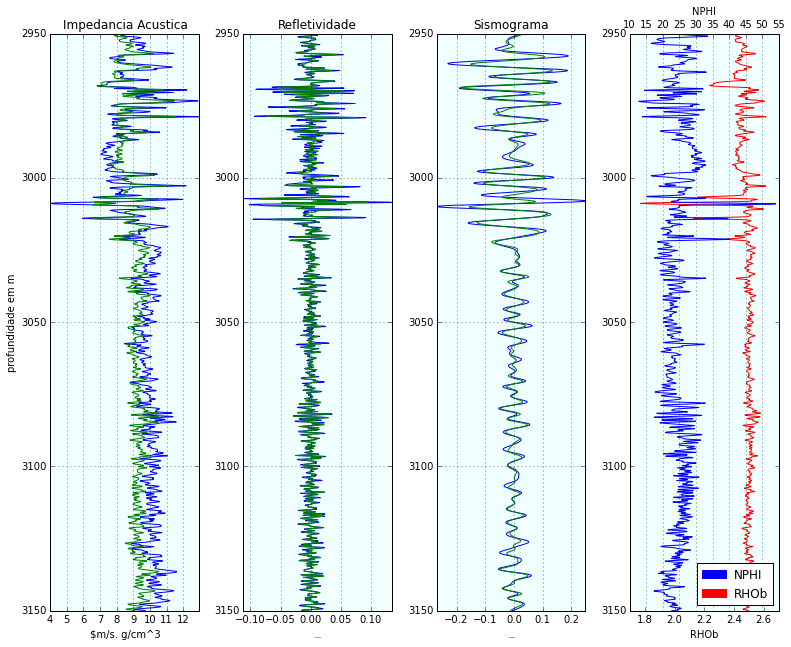

In [28]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(5,5,1, axisbg='#F0FFFF')

ax8.plot(z_imp_s,prof,linewidth = 1,color='b')
ax8.plot(z_imp_a,prof,linewidth = 1,color='g')


ax8.set_title('Impedancia Acustica')
ax8.set_xlabel('$m/s. g/cm^3')
ax8.set_ylabel('profundidade em m')

plt.xlim(xmax=max(z_imp_s),xmin=min(z_imp_s))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax7 = fig.add_subplot(5,5,2, axisbg='#F0FFFF')


ax7.plot(Rs,prof,'-b',linewidth = 1)  #
ax7.plot(Ra,prof,'-g',linewidth = 1)  #
ax7.set_title('Refletividade')
ax7.set_xlabel('$-$')

plt.xlim(xmax=max(Rs),xmin=min(Rs))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(5,5,3, axisbg='#F0FFFF')

ax6.plot(signals,prof,'-b',linewidth = 1) # siqueira
ax6.plot(signala,prof,'-g',linewidth = 1) # augusto
ax6.set_title('Sismograma')
ax6.set_xlabel('$-$')

#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=max(signals),xmin=min(signals))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax23 = fig.add_subplot(5,5,4, axisbg='#F0FFFF')

ax23.plot(RHOb,prof,'-r',linewidth = 1)
#ax23.xlim(xmax=2.95,xmin=1.95)
ax23.set_xlabel('RHOb')

ax24 = ax23.twiny()

ax24.plot(PHIN,prof,'-b',linewidth = 1)
ax24.set_xlabel('NPHI')

ax24label1 = mpatches.Patch(label='NPHI' ,color='b')
ax24label2 = mpatches.Patch(label='RHOb',color='r')

plt.legend(handles=[ax24label1, ax24label2],loc=4)

plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

plt.show()

In [29]:
vals = 300

DD = [signals]*vals
DD = np.array(DD)
DD = np.transpose(DD)

DD1 = [signal1s]*vals
DD1 = np.array(DD1)
DD1 = np.transpose(DD1)

DD2 = [signal2s]*vals
DD2 = np.array(DD2)
DD2 = np.transpose(DD2)

DD3 = [signal3s]*vals
DD3 = np.array(DD3)
DD3 = np.transpose(DD3)

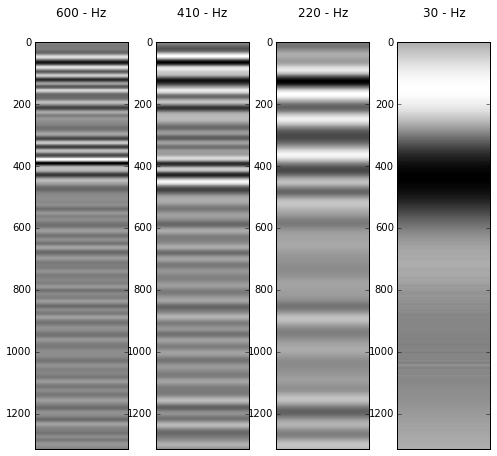

In [30]:
#------------------------------------------#

fig = plt.figure(figsize= (10,200))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax1 = fig.add_subplot(5,5,1, axisbg='#F0FFFF')
ax1.matshow(DD,cmap=cm.gray)

ax1.set_title(ff)

ax1.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax2 = fig.add_subplot(5,5,2, axisbg='#F0FFFF')
ax2.matshow(DD1,cmap=cm.gray)

ax2.set_title(ff1)

ax2.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax3 = fig.add_subplot(5,5,3, axisbg='#F0FFFF')
ax3.matshow(DD2,cmap=cm.gray)

ax3.set_title(ff2)

ax3.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax4 = fig.add_subplot(5,5,4, axisbg='#F0FFFF')
ax4.matshow(DD3,cmap=cm.gray)

ax4.set_title(ff3)

ax4.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Banco de Dados - Exportando Valores -</font>

In [31]:
X = [353737]*p
Y = [7516858]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTPs   # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp_s  # Impedancia acustica
filef[:,9] = Rs      # Refletividade
filef[:,10] = signals # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp_a  # Impedancia acustica
filef[:,12]= Ra      # Refletividade
filef[:,13]= signala # Sismograma sintetico

np.savetxt('na44_mario.dat', filef, delimiter=' ', fmt='%.4f')